In [69]:
from tensorflow import keras
import keras

In [70]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Task 1

In [71]:
print("Train samples: ", train_images.shape[0])
print("Test smaples: ", test_images.shape[0])

Train samples:  60000
Test smaples:  10000


### Task 2

In [72]:
import numpy as np

print(np.unique(test_labels))
print(len(np.unique(test_labels)))

[0 1 2 3 4 5 6 7 8 9]
10


### Task 3

In [73]:
print(train_images[0].shape)

(28, 28)


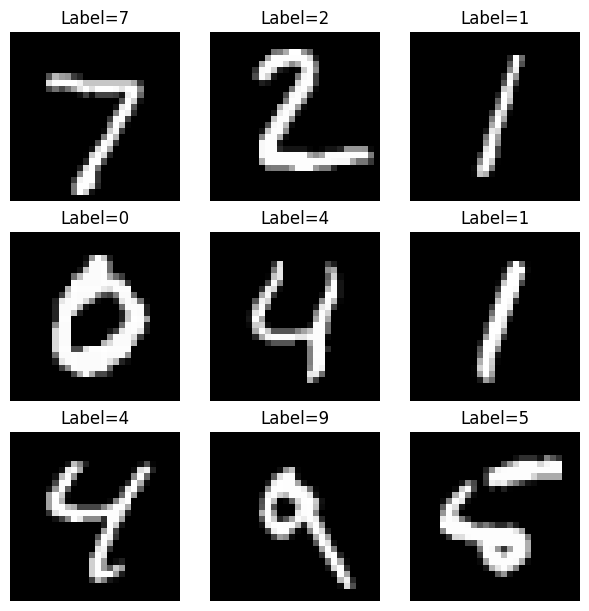

In [74]:
import matplotlib.pyplot as plt

cases = test_images[:9]

fig, axs = plt.subplots(3, 3, figsize=(6, 6), layout='constrained')
for ax, image, label in zip(axs.flat, cases, test_labels):
    ax.set_title(f'Label={label}')
    ax.imshow(image, cmap='gray')
    # ax.tick_params(left=False, bottom=False)
    ax.axis('off')

## Network architecture

In [75]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## Network training

In [76]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [77]:
x_train = np.reshape(train_images, (-1, 28*28)).astype(np.float32)/255
x_test = np.reshape(test_images, (-1, 28*28)).astype(np.float32)/255
x_train.shape

(60000, 784)

In [78]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Fit the model

In [79]:
network.fit(x=x_train, y=train_labels, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8803 - loss: 0.4283
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9664 - loss: 0.1168 
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9789 - loss: 0.0717
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9858 - loss: 0.0500
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0365


## Network evaluation

In [81]:
test_loss, test_acc = network.evaluate(x_test, test_labels)

print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9766 - loss: 0.0744
test_acc: 0.980400025844574
